# Regrid drought files to common grid

Regrid everything to a 2° grid.
If we regrid the 'Aus' files, Tasmania goes missing. Try regridding from the global files instead and then subsetting to Aus.

Regridding the control is done in `process_control_runs.ipynb`

In [13]:
import xarray as xr
import numpy as np
import xesmf as xe
import matplotlib.pyplot as plt
import os
from dask.diagnostics import ProgressBar
import regionmask

import sys
sys.path.append('../')  # import functions to make life easier
import climate_xr_funcs
import climate_droughts_xr_funcs

In [2]:
# # Instructions for regridding using xesmf are here: https://xesmf.readthedocs.io/en/latest/notebooks/Dataset.html
# def regrid_files(ds_to_regrid, ds_target ):
#     # resolution of output: same as cesm-lme
#     ds_out = xr.Dataset({'lat': (['lat'], ds_target.lat),
#                          'lon': (['lon'], ds_target.lon)})

#     regridder = xe.Regridder(ds_to_regrid, ds_out, 'bilinear')
#     regridder.clean_weight_file()

#     ds_out = regridder(ds_to_regrid)
#     for k in ds_to_regrid.data_vars:
#         print(k, ds_out[k].equals(regridder(ds_to_regrid[k])))

#     return ds_out

def regrid_files(ds):
    # resolution of output 3°?
    #[110, 156, -45, -4
#     ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2.5)),
#                          'lon': (['lon'], np.arange(0, 360, 2.5))})
    ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 92, 2)),
                         'lon': (['lon'], np.arange(0, 360, 2))})
    
    regridder = xe.Regridder(ds, ds_out, 'bilinear', periodic=False)
#     regridder = xe.Regridder(ds, ds_out, 'bilinear')


    # regridder.clean_weight_file()
    
    ds_out = regridder(ds)
#     for k in ds.data_vars:
#         print(k, ds_out[k].equals(regridder(ds[k])))
        
    return ds_out

In [3]:
def save_netcdf_compression(ds, output_dir, filename):

    comp = dict(zlib=True, complevel=8)
    encoding = {var: comp for var in ds.data_vars}

    delayed_obj = ds.to_netcdf('%s/%s.nc' % (output_dir, filename), mode='w', compute=False, encoding=encoding)
    with ProgressBar():
        results = delayed_obj.compute()

In [4]:
# Subset to Australia: using regionmask
def get_aus(ds):
    mask = regionmask.defined_regions.natural_earth.countries_110.mask(ds)
    ds_aus = ds.where(mask == 137, drop=True)
    return ds_aus

In [5]:
input_dir = '../files'
# input_dir = '/Users/nickywright/repos/palaeoclimate-lastmillennium/drought_frequencies/'
# input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

---

# Process files

In [33]:
def calculate_drought_sum(ds):
    ds['droughts_2s2e_sum_100yrs'] = (ds.droughts_2s2e.sum(dim='year') / len(ds.year)) * 100
    ds['droughts_2s2e_no_events_100yrs'] = (ds.droughts_2s2e_no_of_events / len(ds.year)) * 100
    
    return ds

# historical

In [34]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

In [35]:
regridded_hist_output_dir = '%s/global_2degrees' % input_dir_hist

In [36]:
if not os.path.exists(regridded_hist_output_dir):
    print("... Creating %s now "  % regridded_hist_output_dir)
    os.makedirs(regridded_hist_output_dir)

In [37]:
regridded_hist_output_dir_aus = '%s/aus_2degrees' % input_dir_hist
if not os.path.exists(regridded_hist_output_dir_aus):
    print("... Creating %s now "  % regridded_hist_output_dir_aus)
    os.makedirs(regridded_hist_output_dir_aus)

## CESM-LME full forcing

### Global

In [38]:
ff1_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '1'))
ff2_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '2'))
ff3_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '3'))
ff4_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '4'))
ff5_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '5'))
ff6_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '6'))
ff7_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '7'))
ff8_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '8'))
ff9_precip_hist_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '9'))
ff10_precip_hist_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '10'))
ff11_precip_hist_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '11'))
ff12_precip_hist_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '12'))
ff13_precip_hist_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_hist_annual.nc' % (input_dir_hist + '/global', '13'))

In [39]:
ff1_precip_hist_annual   = calculate_drought_sum(ff1_precip_hist_annual )
ff2_precip_hist_annual   = calculate_drought_sum(ff2_precip_hist_annual )
ff3_precip_hist_annual   = calculate_drought_sum(ff3_precip_hist_annual )
ff4_precip_hist_annual   = calculate_drought_sum(ff4_precip_hist_annual )
ff5_precip_hist_annual   = calculate_drought_sum(ff5_precip_hist_annual )
ff6_precip_hist_annual   = calculate_drought_sum(ff6_precip_hist_annual )
ff7_precip_hist_annual   = calculate_drought_sum(ff7_precip_hist_annual )
ff8_precip_hist_annual   = calculate_drought_sum(ff8_precip_hist_annual )
ff9_precip_hist_annual   = calculate_drought_sum(ff9_precip_hist_annual )
ff10_precip_hist_annual  = calculate_drought_sum(ff10_precip_hist_annual)
ff11_precip_hist_annual  = calculate_drought_sum(ff11_precip_hist_annual)
ff12_precip_hist_annual  = calculate_drought_sum(ff12_precip_hist_annual)
ff13_precip_hist_annual  = calculate_drought_sum(ff13_precip_hist_annual)


In [41]:
ff1_precip_hist_annual_rg  = regrid_files(ff1_precip_hist_annual)
ff2_precip_hist_annual_rg  = regrid_files(ff2_precip_hist_annual)
ff3_precip_hist_annual_rg  = regrid_files(ff3_precip_hist_annual)
ff4_precip_hist_annual_rg  = regrid_files(ff4_precip_hist_annual)
ff5_precip_hist_annual_rg  = regrid_files(ff5_precip_hist_annual)
ff6_precip_hist_annual_rg  = regrid_files(ff6_precip_hist_annual)
ff7_precip_hist_annual_rg  = regrid_files(ff7_precip_hist_annual)
ff8_precip_hist_annual_rg  = regrid_files(ff8_precip_hist_annual)
ff9_precip_hist_annual_rg  = regrid_files(ff9_precip_hist_annual)
ff10_precip_hist_annual_rg = regrid_files(ff10_precip_hist_annual)
ff11_precip_hist_annual_rg = regrid_files(ff11_precip_hist_annual)
ff12_precip_hist_annual_rg = regrid_files(ff12_precip_hist_annual)
ff13_precip_hist_annual_rg = regrid_files(ff13_precip_hist_annual)

In [42]:
save_netcdf_compression(ff1_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '1')
save_netcdf_compression(ff2_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '2')
save_netcdf_compression(ff3_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '3')
save_netcdf_compression(ff4_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '4')
save_netcdf_compression(ff5_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '5')
save_netcdf_compression(ff6_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '6')
save_netcdf_compression(ff7_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '7')
save_netcdf_compression(ff8_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '8')
save_netcdf_compression(ff9_precip_hist_annual_rg , regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '9')
save_netcdf_compression(ff10_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '10')
save_netcdf_compression(ff11_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '11')
save_netcdf_compression(ff12_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '12')
save_netcdf_compression(ff13_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ff%s_precip_hist_annual_2d' % '13')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [13]:
# ff_all_precip_hist_annual_aus = xr.open_dataset('%s/cesmlme-ff_all_precip_hist_annual.nc' % (input_dir_hist + '/global'))
# ff_all_precip_hist_annual_aus_rg = regrid_files(ff_all_precip_hist_annual_aus)
# save_netcdf_compression(ff_all_precip_hist_annual_aus_rg, regridded_hist_output_dir, 'cesmlme-ff_all_precip_hist_annual_2d.nc')

[########################################] | 100% Completed |  0.1s


### Subset for Aus

In [43]:
ff1_precip_hist_annual_aus_rg  = get_aus(ff1_precip_hist_annual_rg) 
ff2_precip_hist_annual_aus_rg  = get_aus(ff2_precip_hist_annual_rg) 
ff3_precip_hist_annual_aus_rg  = get_aus(ff3_precip_hist_annual_rg) 
ff4_precip_hist_annual_aus_rg  = get_aus(ff4_precip_hist_annual_rg) 
ff5_precip_hist_annual_aus_rg  = get_aus(ff5_precip_hist_annual_rg) 
ff6_precip_hist_annual_aus_rg  = get_aus(ff6_precip_hist_annual_rg) 
ff7_precip_hist_annual_aus_rg  = get_aus(ff7_precip_hist_annual_rg) 
ff8_precip_hist_annual_aus_rg  = get_aus(ff8_precip_hist_annual_rg) 
ff9_precip_hist_annual_aus_rg  = get_aus(ff9_precip_hist_annual_rg) 
ff10_precip_hist_annual_aus_rg = get_aus(ff10_precip_hist_annual_rg)
ff11_precip_hist_annual_aus_rg = get_aus(ff11_precip_hist_annual_rg)
ff12_precip_hist_annual_aus_rg = get_aus(ff12_precip_hist_annual_rg)
ff13_precip_hist_annual_aus_rg = get_aus(ff13_precip_hist_annual_rg)

/Users/nickywright/miniconda3/envs/py38-x86/lib/python3.8/site-packages/regionmask/defined_regions/_natural_earth.py:471: FutureWarning: ``regionmask.defined_regions.natural_earth`` is deprecated. Please use ``regionmask.defined_regions.natural_earth_v4_1_0`` or ``regionmask.defined_regions.natural_earth_v5_0_0`` instead.
  warnings.warn(


In [44]:
save_netcdf_compression(ff1_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '1')
save_netcdf_compression(ff2_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '2')
save_netcdf_compression(ff3_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '3')
save_netcdf_compression(ff4_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '4')
save_netcdf_compression(ff5_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '5')
save_netcdf_compression(ff6_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '6')
save_netcdf_compression(ff7_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '7')
save_netcdf_compression(ff8_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '8')
save_netcdf_compression(ff9_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '9')
save_netcdf_compression(ff10_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '10')
save_netcdf_compression(ff11_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '11')
save_netcdf_compression(ff12_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '12')
save_netcdf_compression(ff13_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ff%s_precip_hist_annual_aus_2d' % '13')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [45]:
# ff_all_precip_hist_annual_aus_rg = get_aus(ff_all_precip_hist_annual_aus_rg)
# save_netcdf_compression(ff_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ff_all_precip_hist_annual_aus2d.nc')

## CESM-LME single forcing

In [46]:
lme_850forcing3_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-850forcing3_precip_hist_annual.nc' % input_dir_hist)
lme_ghg1_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-ghg1_precip_hist_annual.nc' % input_dir_hist)
lme_ghg2_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-ghg2_precip_hist_annual.nc' % input_dir_hist)
lme_ghg3_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-ghg3_precip_hist_annual.nc' % input_dir_hist)
lme_lulc1_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-lulc1_precip_hist_annual.nc' % input_dir_hist)
lme_lulc2_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-lulc2_precip_hist_annual.nc' % input_dir_hist)
lme_lulc3_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-lulc3_precip_hist_annual.nc' % input_dir_hist)
lme_orbital1_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-orbital1_precip_hist_annual.nc' % input_dir_hist)
lme_orbital2_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-orbital2_precip_hist_annual.nc' % input_dir_hist)
lme_orbital3_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-orbital3_precip_hist_annual.nc' % input_dir_hist)
lme_solar1_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-solar1_precip_hist_annual.nc' % input_dir_hist)
lme_solar3_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-solar3_precip_hist_annual.nc' % input_dir_hist)
lme_solar4_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-solar4_precip_hist_annual.nc' % input_dir_hist)
lme_solar5_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-solar5_precip_hist_annual.nc' % input_dir_hist)
lme_ozone1_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-ozone1_precip_hist_annual.nc' % input_dir_hist)
lme_ozone2_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-ozone2_precip_hist_annual.nc' % input_dir_hist)
lme_ozone3_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-ozone3_precip_hist_annual.nc' % input_dir_hist)
lme_ozone4_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-ozone4_precip_hist_annual.nc' % input_dir_hist)
lme_ozone5_precip_hist_annual = xr.open_dataset('%s/global/cesmlme-ozone5_precip_hist_annual.nc' % input_dir_hist)
lme_volc1_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-volc1_precip_hist_annual.nc' % input_dir_hist)
lme_volc2_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-volc2_precip_hist_annual.nc' % input_dir_hist)
lme_volc3_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-volc3_precip_hist_annual.nc' % input_dir_hist)
lme_volc4_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-volc4_precip_hist_annual.nc' % input_dir_hist)

# lme_ghg_all_precip_hist_annual      = xr.open_dataset('%s/global/cesmlme-ghg_all_precip_hist_annual.nc' % input_dir_hist)
# lme_lulc_all_precip_hist_annual     = xr.open_dataset('%s/global/cesmlme-lulc_all_precip_hist_annual.nc' % input_dir_hist)
# lme_orbital_all_precip_hist_annual  = xr.open_dataset('%s/global/cesmlme-orbital_all_precip_hist_annual.nc' % input_dir_hist)
# lme_solar_all_precip_hist_annual   = xr.open_dataset('%s/global/cesmlme-solar_all_precip_hist_annual.nc' % input_dir_hist)
# lme_ozone_all_precip_hist_annual   = xr.open_dataset('%s/global/cesmlme-ozone_all_precip_hist_annual.nc' % input_dir_hist)
# lme_volc_all_precip_hist_annual   = xr.open_dataset('%s/global/cesmlme-volc_all_precip_hist_annual.nc' % input_dir_hist)

In [47]:
lme_850forcing3_precip_hist_annual   = calculate_drought_sum(lme_850forcing3_precip_hist_annual )
lme_ghg1_precip_hist_annual   = calculate_drought_sum(lme_ghg1_precip_hist_annual)
lme_ghg2_precip_hist_annual   = calculate_drought_sum(lme_ghg2_precip_hist_annual)
lme_ghg3_precip_hist_annual   = calculate_drought_sum(lme_ghg3_precip_hist_annual)
lme_lulc1_precip_hist_annual   = calculate_drought_sum(lme_lulc1_precip_hist_annual)
lme_lulc2_precip_hist_annual   = calculate_drought_sum(lme_lulc2_precip_hist_annual)
lme_lulc3_precip_hist_annual   = calculate_drought_sum(lme_lulc3_precip_hist_annual)
lme_orbital1_precip_hist_annual  = calculate_drought_sum(lme_orbital1_precip_hist_annual)
lme_orbital2_precip_hist_annual  = calculate_drought_sum(lme_orbital2_precip_hist_annual)
lme_orbital3_precip_hist_annual  = calculate_drought_sum(lme_orbital3_precip_hist_annual)
lme_solar1_precip_hist_annual  = calculate_drought_sum(lme_solar1_precip_hist_annual)
lme_solar3_precip_hist_annual  = calculate_drought_sum(lme_solar3_precip_hist_annual)
lme_solar4_precip_hist_annual  = calculate_drought_sum(lme_solar4_precip_hist_annual)
lme_solar5_precip_hist_annual  = calculate_drought_sum(lme_solar5_precip_hist_annual)
lme_ozone1_precip_hist_annual  = calculate_drought_sum(lme_ozone1_precip_hist_annual)
lme_ozone2_precip_hist_annual  = calculate_drought_sum(lme_ozone2_precip_hist_annual)
lme_ozone3_precip_hist_annual  = calculate_drought_sum(lme_ozone3_precip_hist_annual)
lme_ozone4_precip_hist_annual  = calculate_drought_sum(lme_ozone4_precip_hist_annual)
lme_ozone5_precip_hist_annual  = calculate_drought_sum(lme_ozone5_precip_hist_annual)
lme_volc1_precip_hist_annual  = calculate_drought_sum(lme_volc1_precip_hist_annual)
lme_volc2_precip_hist_annual  = calculate_drought_sum(lme_volc2_precip_hist_annual)
lme_volc3_precip_hist_annual  = calculate_drought_sum(lme_volc3_precip_hist_annual)
lme_volc4_precip_hist_annual  = calculate_drought_sum(lme_volc4_precip_hist_annual)

In [48]:
lme_850forcing3_precip_hist_annual_rg  = regrid_files(lme_850forcing3_precip_hist_annual)
lme_ghg1_precip_hist_annual_rg  = regrid_files(lme_ghg1_precip_hist_annual)
lme_ghg2_precip_hist_annual_rg  = regrid_files(lme_ghg2_precip_hist_annual)
lme_ghg3_precip_hist_annual_rg  = regrid_files(lme_ghg3_precip_hist_annual)
lme_lulc1_precip_hist_annual_rg = regrid_files(lme_lulc1_precip_hist_annual)
lme_lulc2_precip_hist_annual_rg = regrid_files(lme_lulc2_precip_hist_annual)
lme_lulc3_precip_hist_annual_rg = regrid_files(lme_lulc3_precip_hist_annual)
lme_orbital1_precip_hist_annual_rg  = regrid_files(lme_orbital1_precip_hist_annual)
lme_orbital2_precip_hist_annual_rg  = regrid_files(lme_orbital2_precip_hist_annual)
lme_orbital3_precip_hist_annual_rg  = regrid_files(lme_orbital3_precip_hist_annual)
lme_solar1_precip_hist_annual_rg = regrid_files(lme_solar1_precip_hist_annual)
lme_solar3_precip_hist_annual_rg = regrid_files(lme_solar3_precip_hist_annual)
lme_solar4_precip_hist_annual_rg = regrid_files(lme_solar4_precip_hist_annual)
lme_solar5_precip_hist_annual_rg = regrid_files(lme_solar5_precip_hist_annual)
lme_ozone1_precip_hist_annual_rg = regrid_files(lme_ozone1_precip_hist_annual)
lme_ozone2_precip_hist_annual_rg = regrid_files(lme_ozone2_precip_hist_annual)
lme_ozone3_precip_hist_annual_rg = regrid_files(lme_ozone3_precip_hist_annual)
lme_ozone4_precip_hist_annual_rg = regrid_files(lme_ozone4_precip_hist_annual)
lme_ozone5_precip_hist_annual_rg = regrid_files(lme_ozone5_precip_hist_annual)
lme_volc1_precip_hist_annual_rg = regrid_files(lme_volc1_precip_hist_annual)
lme_volc2_precip_hist_annual_rg = regrid_files(lme_volc2_precip_hist_annual)
lme_volc3_precip_hist_annual_rg = regrid_files(lme_volc3_precip_hist_annual)
lme_volc4_precip_hist_annual_rg = regrid_files(lme_volc4_precip_hist_annual)

# lme_ghg_all_precip_hist_annual_rg     = regrid_files(lme_ghg_all_precip_hist_annual)
# lme_lulc_all_precip_hist_annual_rg    = regrid_files(lme_lulc_all_precip_hist_annual)
# lme_orbital_all_precip_hist_annual_rg = regrid_files(lme_orbital_all_precip_hist_annual)
# lme_solar_all_precip_hist_annual_rg   = regrid_files(lme_solar_all_precip_hist_annual)
# lme_ozone_all_precip_hist_annual_rg   = regrid_files(lme_ozone_all_precip_hist_annual)
# lme_volc_all_precip_hist_annual_rg    = regrid_files(lme_volc_all_precip_hist_annual)

In [49]:
save_netcdf_compression(lme_850forcing3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-850forcing3_precip_hist_annual_2d')
save_netcdf_compression(lme_ghg1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ghg1_precip_hist_annual_2d')
save_netcdf_compression(lme_ghg2_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ghg2_precip_hist_annual_2d')
save_netcdf_compression(lme_ghg3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ghg3_precip_hist_annual_2d')
save_netcdf_compression(lme_lulc1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-lulc1_precip_hist_annual_2d')
save_netcdf_compression(lme_lulc2_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-lulc2_precip_hist_annual_2d')
save_netcdf_compression(lme_lulc3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-lulc3_precip_hist_annual_2d')
save_netcdf_compression(lme_orbital1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-orbital1_precip_hist_annual_2d')
save_netcdf_compression(lme_orbital2_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-orbital2_precip_hist_annual_2d')
save_netcdf_compression(lme_orbital3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-orbital3_precip_hist_annual_2d')
save_netcdf_compression(lme_solar1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-solar1_precip_hist_annual_2d')
save_netcdf_compression(lme_solar3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-solar3_precip_hist_annual_2d')
save_netcdf_compression(lme_solar4_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-solar4_precip_hist_annual_2d')
save_netcdf_compression(lme_solar5_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-solar5_precip_hist_annual_2d')
save_netcdf_compression(lme_ozone1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone1_precip_hist_annual_2d')
save_netcdf_compression(lme_ozone2_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone2_precip_hist_annual_2d')
save_netcdf_compression(lme_ozone3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone3_precip_hist_annual_2d')
save_netcdf_compression(lme_ozone4_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone4_precip_hist_annual_2d')
save_netcdf_compression(lme_ozone5_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone5_precip_hist_annual_2d')
save_netcdf_compression(lme_volc1_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-volc1_precip_hist_annual_2d')
save_netcdf_compression(lme_volc2_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-volc2_precip_hist_annual_2d')
save_netcdf_compression(lme_volc3_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-volc3_precip_hist_annual_2d')
save_netcdf_compression(lme_volc4_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-volc4_precip_hist_annual_2d')

# save_netcdf_compression(lme_ghg_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ghg_all_precip_hist_annual_2d')
# save_netcdf_compression(lme_lulc_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-lulc_all_precip_hist_annual_2d')
# save_netcdf_compression(lme_orbital_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-orbital_all_precip_hist_annual_2d')
# save_netcdf_compression(lme_solar_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-solar_all_precip_hist_annual_2d')
# save_netcdf_compression(lme_ozone_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-ozone_all_precip_hist_annual_2d')
# save_netcdf_compression(lme_volc_all_precip_hist_annual_rg, regridded_hist_output_dir, 'cesmlme-volc_all_precip_hist_annual_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### get Aus

In [50]:
lme_850forcing3_precip_hist_annual_aus_rg  = get_aus(lme_850forcing3_precip_hist_annual_rg)
lme_ghg1_precip_hist_annual_aus_rg  = get_aus(lme_ghg1_precip_hist_annual_rg)
lme_ghg2_precip_hist_annual_aus_rg  = get_aus(lme_ghg2_precip_hist_annual_rg)
lme_ghg3_precip_hist_annual_aus_rg  = get_aus(lme_ghg3_precip_hist_annual_rg)
lme_lulc1_precip_hist_annual_aus_rg = get_aus(lme_lulc1_precip_hist_annual_rg)
lme_lulc2_precip_hist_annual_aus_rg = get_aus(lme_lulc2_precip_hist_annual_rg)
lme_lulc3_precip_hist_annual_aus_rg = get_aus(lme_lulc3_precip_hist_annual_rg)
lme_orbital1_precip_hist_annual_aus_rg  = get_aus(lme_orbital1_precip_hist_annual_rg)
lme_orbital2_precip_hist_annual_aus_rg  = get_aus(lme_orbital2_precip_hist_annual_rg)
lme_orbital3_precip_hist_annual_aus_rg  = get_aus(lme_orbital3_precip_hist_annual_rg)
lme_solar1_precip_hist_annual_aus_rg = get_aus(lme_solar1_precip_hist_annual_rg)
lme_solar3_precip_hist_annual_aus_rg = get_aus(lme_solar3_precip_hist_annual_rg)
lme_solar4_precip_hist_annual_aus_rg = get_aus(lme_solar4_precip_hist_annual_rg)
lme_solar5_precip_hist_annual_aus_rg = get_aus(lme_solar5_precip_hist_annual_rg)
lme_ozone1_precip_hist_annual_aus_rg = get_aus(lme_ozone1_precip_hist_annual_rg)
lme_ozone2_precip_hist_annual_aus_rg = get_aus(lme_ozone2_precip_hist_annual_rg)
lme_ozone3_precip_hist_annual_aus_rg = get_aus(lme_ozone3_precip_hist_annual_rg)
lme_ozone4_precip_hist_annual_aus_rg = get_aus(lme_ozone4_precip_hist_annual_rg)
lme_ozone5_precip_hist_annual_aus_rg = get_aus(lme_ozone5_precip_hist_annual_rg)
lme_volc1_precip_hist_annual_aus_rg = get_aus(lme_volc1_precip_hist_annual_rg)
lme_volc2_precip_hist_annual_aus_rg = get_aus(lme_volc2_precip_hist_annual_rg)
lme_volc3_precip_hist_annual_aus_rg = get_aus(lme_volc3_precip_hist_annual_rg)
lme_volc4_precip_hist_annual_aus_rg = get_aus(lme_volc4_precip_hist_annual_rg)

# lme_ghg_all_precip_hist_annual_aus_rg     = get_aus(lme_ghg_all_precip_hist_annual_rg)
# lme_lulc_all_precip_hist_annual_aus_rg    = get_aus(lme_lulc_all_precip_hist_annual_rg)
# lme_orbital_all_precip_hist_annual_aus_rg = get_aus(lme_orbital_all_precip_hist_annual_rg)
# lme_solar_all_precip_hist_annual_aus_rg   = get_aus(lme_solar_all_precip_hist_annual_rg)
# lme_ozone_all_precip_hist_annual_aus_rg   = get_aus(lme_ozone_all_precip_hist_annual_rg)
# lme_volc_all_precip_hist_annual_aus_rg    = get_aus(lme_volc_all_precip_hist_annual_rg)

In [51]:
save_netcdf_compression(lme_850forcing3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-850forcing3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ghg1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg2_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ghg2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ghg3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ghg3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-lulc1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc2_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-lulc2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_lulc3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-lulc3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-orbital1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital2_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-orbital2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_orbital3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-orbital3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-solar1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-solar3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar4_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-solar4_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_solar5_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-solar5_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone2_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone4_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone4_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_ozone5_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone5_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc1_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-volc1_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc2_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-volc2_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-volc3_precip_hist_annual_aus_2d')
save_netcdf_compression(lme_volc4_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-volc4_precip_hist_annual_aus_2d')

# save_netcdf_compression(lme_ghg_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ghg_all_precip_hist_annual_aus_2d')
# save_netcdf_compression(lme_lulc_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-lulc_all_precip_hist_annual_aus_2d')
# save_netcdf_compression(lme_orbital_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-orbital_all_precip_hist_annual_aus_2d')
# save_netcdf_compression(lme_solar_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-solar_all_precip_hist_annual_aus_2d')
# save_netcdf_compression(lme_ozone_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-ozone_all_precip_hist_annual_aus_2d')
# save_netcdf_compression(lme_volc_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'cesmlme-volc_all_precip_hist_annual_aus_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

## PMIP3 files

In [52]:
bcc_precip_hist_annual        = xr.open_dataset('%s/global/bcc_precip_hist_annual.nc' % input_dir_hist)
ccsm4_precip_hist_annual      = xr.open_dataset('%s/global/ccsm4_precip_hist_annual.nc' % input_dir_hist)
csiro_mk3l_precip_hist_annual = xr.open_dataset('%s/global/csiro_mk3l_precip_hist_annual.nc' % input_dir_hist)
fgoals_gl_precip_hist_annual  = xr.open_dataset('%s/global/fgoals_gl_precip_hist_annual.nc' % input_dir_hist)
fgoals_s2_precip_hist_annual  = xr.open_dataset('%s/global/fgoals_s2_precip_hist_annual.nc' % input_dir_hist)
giss_21_precip_hist_annual    = xr.open_dataset('%s/global/giss_21_precip_hist_annual.nc' % input_dir_hist)
giss_22_precip_hist_annual    = xr.open_dataset('%s/global/giss_22_precip_hist_annual.nc' % input_dir_hist)
giss_23_precip_hist_annual    = xr.open_dataset('%s/global/giss_23_precip_hist_annual.nc' % input_dir_hist)
giss_24_precip_hist_annual    = xr.open_dataset('%s/global/giss_24_precip_hist_annual.nc' % input_dir_hist)
giss_25_precip_hist_annual    = xr.open_dataset('%s/global/giss_25_precip_hist_annual.nc' % input_dir_hist)
giss_26_precip_hist_annual    = xr.open_dataset('%s/global/giss_26_precip_hist_annual.nc' % input_dir_hist)
giss_27_precip_hist_annual    = xr.open_dataset('%s/global/giss_27_precip_hist_annual.nc' % input_dir_hist)
giss_28_precip_hist_annual    = xr.open_dataset('%s/global/giss_28_precip_hist_annual.nc' % input_dir_hist)
hadcm3_precip_hist_annual     = xr.open_dataset('%s/global/hadcm3_precip_hist_annual.nc' % input_dir_hist)
ipsl_precip_hist_annual       = xr.open_dataset('%s/global/ipsl_precip_hist_annual.nc' % input_dir_hist)
miroc_precip_hist_annual      = xr.open_dataset('%s/global/miroc_precip_hist_annual.nc' % input_dir_hist)
mpi_precip_hist_annual        = xr.open_dataset('%s/global/mpi_precip_hist_annual.nc' % input_dir_hist)
mri_precip_hist_annual        = xr.open_dataset('%s/global/mri_precip_hist_annual.nc' % input_dir_hist)

# giss_all_precip_hist_annual = xr.open_dataset('%s/global/giss_all_precip_hist_annual.nc' % input_dir_hist)

get rid of unneeded bounds

In [53]:
bcc_precip_hist_annual = bcc_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_hist_annual = ccsm4_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_hist_annual = csiro_mk3l_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_hist_annual = fgoals_gl_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_hist_annual = fgoals_s2_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_21_precip_hist_annual = giss_21_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_22_precip_hist_annual = giss_22_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_23_precip_hist_annual = giss_23_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_24_precip_hist_annual = giss_24_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_25_precip_hist_annual = giss_25_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_26_precip_hist_annual = giss_26_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_27_precip_hist_annual = giss_27_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_hist_annual = giss_28_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_hist_annual = hadcm3_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_hist_annual = ipsl_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_hist_annual = miroc_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_hist_annual = mpi_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))
mri_precip_hist_annual = mri_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))

# giss_all_precip_hist_annual = giss_all_precip_hist_annual.drop(('lat_bnds', 'lon_bnds'))

In [96]:
bcc_precip_hist_annual   = calculate_drought_sum(bcc_precip_hist_annual)
ccsm4_precip_hist_annual   = calculate_drought_sum(ccsm4_precip_hist_annual)
csiro_mk3l_precip_hist_annual   = calculate_drought_sum(csiro_mk3l_precip_hist_annual)
fgoals_gl_precip_hist_annual   = calculate_drought_sum(fgoals_gl_precip_hist_annual)
fgoals_s2_precip_hist_annual   = calculate_drought_sum(fgoals_s2_precip_hist_annual)
giss_21_precip_hist_annual   = calculate_drought_sum(giss_21_precip_hist_annual)
giss_22_precip_hist_annual   = calculate_drought_sum(giss_22_precip_hist_annual)
giss_23_precip_hist_annual   = calculate_drought_sum(giss_23_precip_hist_annual)
giss_24_precip_hist_annual   = calculate_drought_sum(giss_24_precip_hist_annual)
giss_25_precip_hist_annual  = calculate_drought_sum(giss_25_precip_hist_annual)
giss_26_precip_hist_annual  = calculate_drought_sum(giss_26_precip_hist_annual)
giss_27_precip_hist_annual  = calculate_drought_sum(giss_27_precip_hist_annual)
giss_28_precip_hist_annual  = calculate_drought_sum(giss_28_precip_hist_annual)

hadcm3_precip_hist_annual  = calculate_drought_sum(hadcm3_precip_hist_annual)
ipsl_precip_hist_annual  = calculate_drought_sum(ipsl_precip_hist_annual)
miroc_precip_hist_annual  = calculate_drought_sum(miroc_precip_hist_annual)
mpi_precip_hist_annual  = calculate_drought_sum(mpi_precip_hist_annual)
mri_precip_hist_annual  = calculate_drought_sum(mri_precip_hist_annual)


In [97]:
bcc_precip_hist_annual_rg        = regrid_files(bcc_precip_hist_annual)
ccsm4_precip_hist_annual_rg      = regrid_files(ccsm4_precip_hist_annual)
csiro_mk3l_precip_hist_annual_rg = regrid_files(csiro_mk3l_precip_hist_annual)
fgoals_gl_precip_hist_annual_rg  = regrid_files(fgoals_gl_precip_hist_annual)
fgoals_s2_precip_hist_annual_rg  = regrid_files(fgoals_s2_precip_hist_annual)
giss_21_precip_hist_annual_rg    = regrid_files(giss_21_precip_hist_annual)
giss_22_precip_hist_annual_rg    = regrid_files(giss_22_precip_hist_annual)
giss_23_precip_hist_annual_rg    = regrid_files(giss_23_precip_hist_annual)
giss_24_precip_hist_annual_rg    = regrid_files(giss_24_precip_hist_annual)
giss_25_precip_hist_annual_rg    = regrid_files(giss_25_precip_hist_annual)
giss_26_precip_hist_annual_rg    = regrid_files(giss_26_precip_hist_annual)
giss_27_precip_hist_annual_rg    = regrid_files(giss_27_precip_hist_annual)
giss_28_precip_hist_annual_rg    = regrid_files(giss_28_precip_hist_annual)
hadcm3_precip_hist_annual_rg     = regrid_files(hadcm3_precip_hist_annual)
ipsl_precip_hist_annual_rg       = regrid_files(ipsl_precip_hist_annual)
miroc_precip_hist_annual_rg      = regrid_files(miroc_precip_hist_annual)
mpi_precip_hist_annual_rg        = regrid_files(mpi_precip_hist_annual)
mri_precip_hist_annual_rg        = regrid_files(mri_precip_hist_annual)

# giss_all_precip_hist_annual_rg = regrid_files(giss_all_precip_hist_annual)

In [98]:
save_netcdf_compression(bcc_precip_hist_annual_rg , regridded_hist_output_dir, 'bcc_precip_hist_annual_2d')
save_netcdf_compression(ccsm4_precip_hist_annual_rg , regridded_hist_output_dir, 'ccsm4_precip_hist_annual_2d')
save_netcdf_compression(csiro_mk3l_precip_hist_annual_rg , regridded_hist_output_dir, 'csiro_mk3l_precip_hist_annual_2d')
save_netcdf_compression(fgoals_gl_precip_hist_annual_rg , regridded_hist_output_dir, 'fgoals_gl_precip_hist_annual_2d')
save_netcdf_compression(fgoals_s2_precip_hist_annual_rg , regridded_hist_output_dir, 'fgoals_s2_precip_hist_annual_2d')
save_netcdf_compression(giss_21_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_21_precip_hist_annual_2d')
save_netcdf_compression(giss_22_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_22_precip_hist_annual_2d')
save_netcdf_compression(giss_23_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_23_precip_hist_annual_2d')
save_netcdf_compression(giss_24_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_24_precip_hist_annual_2d')
save_netcdf_compression(giss_25_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_25_precip_hist_annual_2d')
save_netcdf_compression(giss_26_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_26_precip_hist_annual_2d')
save_netcdf_compression(giss_27_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_27_precip_hist_annual_2d')
save_netcdf_compression(giss_28_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_28_precip_hist_annual_2d')
save_netcdf_compression(hadcm3_precip_hist_annual_rg, regridded_hist_output_dir, 'hadcm3_precip_hist_annual_2d')
save_netcdf_compression(ipsl_precip_hist_annual_rg, regridded_hist_output_dir, 'ipsl_precip_hist_annual_2d')
save_netcdf_compression(miroc_precip_hist_annual_rg, regridded_hist_output_dir, 'miroc_precip_hist_annual_2d')
save_netcdf_compression(mpi_precip_hist_annual_rg, regridded_hist_output_dir, 'mpi_precip_hist_annual_2d')
save_netcdf_compression(mri_precip_hist_annual_rg, regridded_hist_output_dir, 'mri_precip_hist_annual_2d')
# save_netcdf_compression(giss_all_precip_hist_annual_rg, regridded_hist_output_dir, 'giss_all_precip_hist_annual_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### get aus

In [99]:
bcc_precip_hist_annual_aus_rg        = get_aus(bcc_precip_hist_annual_rg)
ccsm4_precip_hist_annual_aus_rg      = get_aus(ccsm4_precip_hist_annual_rg)
csiro_mk3l_precip_hist_annual_aus_rg = get_aus(csiro_mk3l_precip_hist_annual_rg)
fgoals_gl_precip_hist_annual_aus_rg  = get_aus(fgoals_gl_precip_hist_annual_rg)
fgoals_s2_precip_hist_annual_aus_rg  = get_aus(fgoals_s2_precip_hist_annual_rg)
giss_21_precip_hist_annual_aus_rg    = get_aus(giss_21_precip_hist_annual_rg)
giss_22_precip_hist_annual_aus_rg    = get_aus(giss_22_precip_hist_annual_rg)
giss_23_precip_hist_annual_aus_rg    = get_aus(giss_23_precip_hist_annual_rg)
giss_24_precip_hist_annual_aus_rg    = get_aus(giss_24_precip_hist_annual_rg)
giss_25_precip_hist_annual_aus_rg    = get_aus(giss_25_precip_hist_annual_rg)
giss_26_precip_hist_annual_aus_rg    = get_aus(giss_26_precip_hist_annual_rg)
giss_27_precip_hist_annual_aus_rg    = get_aus(giss_27_precip_hist_annual_rg)
giss_28_precip_hist_annual_aus_rg    = get_aus(giss_28_precip_hist_annual_rg)
hadcm3_precip_hist_annual_aus_rg     = get_aus(hadcm3_precip_hist_annual_rg)
ipsl_precip_hist_annual_aus_rg       = get_aus(ipsl_precip_hist_annual_rg)
miroc_precip_hist_annual_aus_rg      = get_aus(miroc_precip_hist_annual_rg)
mpi_precip_hist_annual_aus_rg        = get_aus(mpi_precip_hist_annual_rg)
mri_precip_hist_annual_aus_rg        = get_aus(mri_precip_hist_annual_rg)

# giss_all_precip_hist_annual_aus_rg = get_aus(giss_all_precip_hist_annual)

In [100]:
save_netcdf_compression(bcc_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'bcc_precip_hist_annual_aus_2d')
save_netcdf_compression(ccsm4_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'ccsm4_precip_hist_annual_aus_2d')
save_netcdf_compression(csiro_mk3l_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'csiro_mk3l_precip_hist_annual_aus_2d')
save_netcdf_compression(fgoals_gl_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'fgoals_gl_precip_hist_annual_aus_2d')
save_netcdf_compression(fgoals_s2_precip_hist_annual_aus_rg , regridded_hist_output_dir_aus, 'fgoals_s2_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_21_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_21_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_22_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_22_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_23_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_23_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_24_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_24_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_25_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_25_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_26_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_26_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_27_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_27_precip_hist_annual_aus_2d')
save_netcdf_compression(giss_28_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_28_precip_hist_annual_aus_2d')
save_netcdf_compression(hadcm3_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'hadcm3_precip_hist_annual_aus_2d')
save_netcdf_compression(ipsl_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'ipsl_precip_hist_annual_aus_2d')
save_netcdf_compression(miroc_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'miroc_precip_hist_annual_aus_2d')
save_netcdf_compression(mpi_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'mpi_precip_hist_annual_aus_2d')
save_netcdf_compression(mri_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'mri_precip_hist_annual_aus_2d')
# save_netcdf_compression(giss_all_precip_hist_annual_aus_rg, regridded_hist_output_dir_aus, 'giss_all_precip_hist_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

## last millennium

In [59]:
input_dir_lm = '%s/lastmillennium_threshold_1900-2000' % (input_dir)

In [60]:
regridded_lm_output_dir = '%s/global_2degrees' % input_dir_lm

if not os.path.exists(regridded_lm_output_dir):
    print("... Creating %s now "  % regridded_lm_output_dir)
    os.makedirs(regridded_lm_output_dir)

... Creating ../files/lastmillennium_threshold_1900-2000/global_2degrees now 


In [61]:
regridded_lm_output_dir_aus = '%s/aus_2degrees' % input_dir_lm

if not os.path.exists(regridded_lm_output_dir_aus):
    print("... Creating %s now "  % regridded_lm_output_dir_aus)
    os.makedirs(regridded_lm_output_dir_aus)

... Creating ../files/lastmillennium_threshold_1900-2000/aus_2degrees now 


In [63]:
lacie_lm = '/Volumes/LaCie/aus-droughts-last-mill/files/lastmillennium_threshold_1900-2000'

### CESM-LME full forcing

In [64]:
ff1_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '1'))
ff2_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '2'))
ff3_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '3'))
ff4_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '4'))
ff5_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '5'))
ff6_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '6'))
ff7_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '7'))
ff8_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '8'))
ff9_precip_lm_annual  = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '9'))
ff10_precip_lm_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '10'))
ff11_precip_lm_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '11'))
ff12_precip_lm_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '12'))
ff13_precip_lm_annual = xr.open_dataset('%s/cesmlme-ff%s_precip_lm_annual.nc' % (lacie_lm + '/global', '13'))

In [65]:
ff1_precip_lm_annual   = calculate_drought_sum(ff1_precip_lm_annual )
ff2_precip_lm_annual   = calculate_drought_sum(ff2_precip_lm_annual )
ff3_precip_lm_annual   = calculate_drought_sum(ff3_precip_lm_annual )
ff4_precip_lm_annual   = calculate_drought_sum(ff4_precip_lm_annual )
ff5_precip_lm_annual   = calculate_drought_sum(ff5_precip_lm_annual )
ff6_precip_lm_annual   = calculate_drought_sum(ff6_precip_lm_annual )
ff7_precip_lm_annual   = calculate_drought_sum(ff7_precip_lm_annual )
ff8_precip_lm_annual   = calculate_drought_sum(ff8_precip_lm_annual )
ff9_precip_lm_annual   = calculate_drought_sum(ff9_precip_lm_annual )
ff10_precip_lm_annual  = calculate_drought_sum(ff10_precip_lm_annual)
ff11_precip_lm_annual  = calculate_drought_sum(ff11_precip_lm_annual)
ff12_precip_lm_annual  = calculate_drought_sum(ff12_precip_lm_annual)
ff13_precip_lm_annual  = calculate_drought_sum(ff13_precip_lm_annual)


In [66]:
ff1_precip_lm_annual_rg  = regrid_files(ff1_precip_lm_annual)
ff2_precip_lm_annual_rg  = regrid_files(ff2_precip_lm_annual)
ff3_precip_lm_annual_rg  = regrid_files(ff3_precip_lm_annual)
ff4_precip_lm_annual_rg  = regrid_files(ff4_precip_lm_annual)
ff5_precip_lm_annual_rg  = regrid_files(ff5_precip_lm_annual)
ff6_precip_lm_annual_rg  = regrid_files(ff6_precip_lm_annual)
ff7_precip_lm_annual_rg  = regrid_files(ff7_precip_lm_annual)
ff8_precip_lm_annual_rg  = regrid_files(ff8_precip_lm_annual)
ff9_precip_lm_annual_rg  = regrid_files(ff9_precip_lm_annual)
ff10_precip_lm_annual_rg = regrid_files(ff10_precip_lm_annual)
ff11_precip_lm_annual_rg = regrid_files(ff11_precip_lm_annual)
ff12_precip_lm_annual_rg = regrid_files(ff12_precip_lm_annual)
ff13_precip_lm_annual_rg = regrid_files(ff13_precip_lm_annual)

save_netcdf_compression(ff1_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '1')
save_netcdf_compression(ff2_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '2')
save_netcdf_compression(ff3_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '3')
save_netcdf_compression(ff4_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '4')
save_netcdf_compression(ff5_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '5')
save_netcdf_compression(ff6_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '6')
save_netcdf_compression(ff7_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '7')
save_netcdf_compression(ff8_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '8')
save_netcdf_compression(ff9_precip_lm_annual_rg , regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '9')
save_netcdf_compression(ff10_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '10')
save_netcdf_compression(ff11_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '11')
save_netcdf_compression(ff12_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '12')
save_netcdf_compression(ff13_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ff%s_precip_lm_annual_2d' % '13')

# ff_all_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff_all_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus'))
# ff_all_precip_lm_annual_aus_rg = regrid_files(ff_all_precip_lm_annual_aus)
# save_netcdf_compression(ff_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [67]:
ff1_precip_lm_annual_aus_rg  = get_aus(ff1_precip_lm_annual_rg)
ff2_precip_lm_annual_aus_rg  = get_aus(ff2_precip_lm_annual_rg)
ff3_precip_lm_annual_aus_rg  = get_aus(ff3_precip_lm_annual_rg)
ff4_precip_lm_annual_aus_rg  = get_aus(ff4_precip_lm_annual_rg)
ff5_precip_lm_annual_aus_rg  = get_aus(ff5_precip_lm_annual_rg)
ff6_precip_lm_annual_aus_rg  = get_aus(ff6_precip_lm_annual_rg)
ff7_precip_lm_annual_aus_rg  = get_aus(ff7_precip_lm_annual_rg)
ff8_precip_lm_annual_aus_rg  = get_aus(ff8_precip_lm_annual_rg)
ff9_precip_lm_annual_aus_rg  = get_aus(ff9_precip_lm_annual_rg)
ff10_precip_lm_annual_aus_rg = get_aus(ff10_precip_lm_annual_rg)
ff11_precip_lm_annual_aus_rg = get_aus(ff11_precip_lm_annual_rg)
ff12_precip_lm_annual_aus_rg = get_aus(ff12_precip_lm_annual_rg)
ff13_precip_lm_annual_aus_rg = get_aus(ff13_precip_lm_annual_rg)

save_netcdf_compression(ff1_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '1')
save_netcdf_compression(ff2_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '2')
save_netcdf_compression(ff3_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '3')
save_netcdf_compression(ff4_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '4')
save_netcdf_compression(ff5_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '5')
save_netcdf_compression(ff6_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '6')
save_netcdf_compression(ff7_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '7')
save_netcdf_compression(ff8_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '8')
save_netcdf_compression(ff9_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '9')
save_netcdf_compression(ff10_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '10')
save_netcdf_compression(ff11_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '11')
save_netcdf_compression(ff12_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '12')
save_netcdf_compression(ff13_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ff%s_precip_lm_annual_aus_2d' % '13')

# ff_all_precip_lm_annual_aus = xr.open_dataset('%s/cesmlme-ff_all_precip_lm_annual_aus.nc' % (input_dir_lm + '/aus'))
# ff_all_precip_lm_annual_aus_rg = regrid_files(ff_all_precip_lm_annual_aus)
# save_netcdf_compression(ff_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'cesmlme-ff_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


### CESM-LME single forcing

In [68]:
lme_850forcing3_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-850forcing3_precip_lm_annual.nc' % lacie_lm)
lme_ghg1_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-ghg1_precip_lm_annual.nc' % lacie_lm)
lme_ghg2_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-ghg2_precip_lm_annual.nc' % lacie_lm)
lme_ghg3_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-ghg3_precip_lm_annual.nc' % lacie_lm)
lme_lulc1_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-lulc1_precip_lm_annual.nc' % lacie_lm)
lme_lulc2_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-lulc2_precip_lm_annual.nc' % lacie_lm)
lme_lulc3_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-lulc3_precip_lm_annual.nc' % lacie_lm)
lme_orbital1_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-orbital1_precip_lm_annual.nc' % lacie_lm)
lme_orbital2_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-orbital2_precip_lm_annual.nc' % lacie_lm)
lme_orbital3_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-orbital3_precip_lm_annual.nc' % lacie_lm)
lme_solar1_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-solar1_precip_lm_annual.nc' % lacie_lm)
lme_solar3_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-solar3_precip_lm_annual.nc' % lacie_lm)
lme_solar4_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-solar4_precip_lm_annual.nc' % lacie_lm)
lme_solar5_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-solar5_precip_lm_annual.nc' % lacie_lm)
lme_ozone1_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-ozone1_precip_lm_annual.nc' % lacie_lm)
lme_ozone2_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-ozone2_precip_lm_annual.nc' % lacie_lm)
lme_ozone3_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-ozone3_precip_lm_annual.nc' % lacie_lm)
lme_ozone4_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-ozone4_precip_lm_annual.nc' % lacie_lm)
lme_ozone5_precip_lm_annual = xr.open_dataset('%s/global/cesmlme-ozone5_precip_lm_annual.nc' % lacie_lm)
lme_volc1_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-volc1_precip_lm_annual.nc' % lacie_lm)
lme_volc2_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-volc2_precip_lm_annual.nc' % lacie_lm)
lme_volc3_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-volc3_precip_lm_annual.nc' % lacie_lm)
lme_volc4_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-volc4_precip_lm_annual.nc' % lacie_lm)

# lme_ghg_all_precip_lm_annual      = xr.open_dataset('%s/global/cesmlme-ghg_all_precip_lm_annual.nc' % input_dir_lm)
# lme_lulc_all_precip_lm_annual     = xr.open_dataset('%s/global/cesmlme-lulc_all_precip_lm_annual.nc' % input_dir_lm)
# lme_orbital_all_precip_lm_annual  = xr.open_dataset('%s/global/cesmlme-orbital_all_precip_lm_annual.nc' % input_dir_lm)
# lme_solar_all_precip_lm_annual   = xr.open_dataset('%s/global/cesmlme-solar_all_precip_lm_annual.nc' % input_dir_lm)
# lme_ozone_all_precip_lm_annual   = xr.open_dataset('%s/global/cesmlme-ozone_all_precip_lm_annual.nc' % input_dir_lm)
# lme_volc_all_precip_lm_annual   = xr.open_dataset('%s/global/cesmlme-volc_all_precip_lm_annual.nc' % input_dir_lm)

In [69]:
lme_850forcing3_precip_lm_annual   = calculate_drought_sum(lme_850forcing3_precip_lm_annual )
lme_ghg1_precip_lm_annual   = calculate_drought_sum(lme_ghg1_precip_lm_annual)
lme_ghg2_precip_lm_annual   = calculate_drought_sum(lme_ghg2_precip_lm_annual)
lme_ghg3_precip_lm_annual   = calculate_drought_sum(lme_ghg3_precip_lm_annual)
lme_lulc1_precip_lm_annual   = calculate_drought_sum(lme_lulc1_precip_lm_annual)
lme_lulc2_precip_lm_annual   = calculate_drought_sum(lme_lulc2_precip_lm_annual)
lme_lulc3_precip_lm_annual   = calculate_drought_sum(lme_lulc3_precip_lm_annual)
lme_orbital1_precip_lm_annual  = calculate_drought_sum(lme_orbital1_precip_lm_annual)
lme_orbital2_precip_lm_annual  = calculate_drought_sum(lme_orbital2_precip_lm_annual)
lme_orbital3_precip_lm_annual  = calculate_drought_sum(lme_orbital3_precip_lm_annual)
lme_solar1_precip_lm_annual  = calculate_drought_sum(lme_solar1_precip_lm_annual)
lme_solar3_precip_lm_annual  = calculate_drought_sum(lme_solar3_precip_lm_annual)
lme_solar4_precip_lm_annual  = calculate_drought_sum(lme_solar4_precip_lm_annual)
lme_solar5_precip_lm_annual  = calculate_drought_sum(lme_solar5_precip_lm_annual)
lme_ozone1_precip_lm_annual  = calculate_drought_sum(lme_ozone1_precip_lm_annual)
lme_ozone2_precip_lm_annual  = calculate_drought_sum(lme_ozone2_precip_lm_annual)
lme_ozone3_precip_lm_annual  = calculate_drought_sum(lme_ozone3_precip_lm_annual)
lme_ozone4_precip_lm_annual  = calculate_drought_sum(lme_ozone4_precip_lm_annual)
lme_ozone5_precip_lm_annual  = calculate_drought_sum(lme_ozone5_precip_lm_annual)
lme_volc1_precip_lm_annual  = calculate_drought_sum(lme_volc1_precip_lm_annual)
lme_volc2_precip_lm_annual  = calculate_drought_sum(lme_volc2_precip_lm_annual)
lme_volc3_precip_lm_annual  = calculate_drought_sum(lme_volc3_precip_lm_annual)
lme_volc4_precip_lm_annual  = calculate_drought_sum(lme_volc4_precip_lm_annual)

In [70]:
lme_850forcing3_precip_lm_annual_rg  = regrid_files(lme_850forcing3_precip_lm_annual)
lme_ghg1_precip_lm_annual_rg  = regrid_files(lme_ghg1_precip_lm_annual)
lme_ghg2_precip_lm_annual_rg  = regrid_files(lme_ghg2_precip_lm_annual)
lme_ghg3_precip_lm_annual_rg  = regrid_files(lme_ghg3_precip_lm_annual)
lme_lulc1_precip_lm_annual_rg = regrid_files(lme_lulc1_precip_lm_annual)
lme_lulc2_precip_lm_annual_rg = regrid_files(lme_lulc2_precip_lm_annual)
lme_lulc3_precip_lm_annual_rg = regrid_files(lme_lulc3_precip_lm_annual)
lme_orbital1_precip_lm_annual_rg  = regrid_files(lme_orbital1_precip_lm_annual)
lme_orbital2_precip_lm_annual_rg  = regrid_files(lme_orbital2_precip_lm_annual)
lme_orbital3_precip_lm_annual_rg  = regrid_files(lme_orbital3_precip_lm_annual)
lme_solar1_precip_lm_annual_rg = regrid_files(lme_solar1_precip_lm_annual)
lme_solar3_precip_lm_annual_rg = regrid_files(lme_solar3_precip_lm_annual)
lme_solar4_precip_lm_annual_rg = regrid_files(lme_solar4_precip_lm_annual)
lme_solar5_precip_lm_annual_rg = regrid_files(lme_solar5_precip_lm_annual)
lme_ozone1_precip_lm_annual_rg = regrid_files(lme_ozone1_precip_lm_annual)
lme_ozone2_precip_lm_annual_rg = regrid_files(lme_ozone2_precip_lm_annual)
lme_ozone3_precip_lm_annual_rg = regrid_files(lme_ozone3_precip_lm_annual)
lme_ozone4_precip_lm_annual_rg = regrid_files(lme_ozone4_precip_lm_annual)
lme_ozone5_precip_lm_annual_rg = regrid_files(lme_ozone5_precip_lm_annual)
lme_volc1_precip_lm_annual_rg = regrid_files(lme_volc1_precip_lm_annual)
lme_volc2_precip_lm_annual_rg = regrid_files(lme_volc2_precip_lm_annual)
lme_volc3_precip_lm_annual_rg = regrid_files(lme_volc3_precip_lm_annual)
lme_volc4_precip_lm_annual_rg = regrid_files(lme_volc4_precip_lm_annual)

# lme_ghg_all_precip_lm_annual_rg     = regrid_files(lme_ghg_all_precip_lm_annual)
# lme_lulc_all_precip_lm_annual_rg    = regrid_files(lme_lulc_all_precip_lm_annual)
# lme_orbital_all_precip_lm_annual_rg = regrid_files(lme_orbital_all_precip_lm_annual)
# lme_solar_all_precip_lm_annual_rg   = regrid_files(lme_solar_all_precip_lm_annual)
# lme_ozone_all_precip_lm_annual_rg   = regrid_files(lme_ozone_all_precip_lm_annual)
# lme_volc_all_precip_lm_annual_rg    = regrid_files(lme_volc_all_precip_lm_annual)

In [71]:
save_netcdf_compression(lme_850forcing3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-850forcing3_precip_lm_annual_2d')
save_netcdf_compression(lme_ghg1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ghg1_precip_lm_annual_2d')
save_netcdf_compression(lme_ghg2_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ghg2_precip_lm_annual_2d')
save_netcdf_compression(lme_ghg3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ghg3_precip_lm_annual_2d')
save_netcdf_compression(lme_lulc1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-lulc1_precip_lm_annual_2d')
save_netcdf_compression(lme_lulc2_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-lulc2_precip_lm_annual_2d')
save_netcdf_compression(lme_lulc3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-lulc3_precip_lm_annual_2d')
save_netcdf_compression(lme_orbital1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-orbital1_precip_lm_annual_2d')
save_netcdf_compression(lme_orbital2_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-orbital2_precip_lm_annual_2d')
save_netcdf_compression(lme_orbital3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-orbital3_precip_lm_annual_2d')
save_netcdf_compression(lme_solar1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-solar1_precip_lm_annual_2d')
save_netcdf_compression(lme_solar3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-solar3_precip_lm_annual_2d')
save_netcdf_compression(lme_solar4_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-solar4_precip_lm_annual_2d')
save_netcdf_compression(lme_solar5_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-solar5_precip_lm_annual_2d')
save_netcdf_compression(lme_ozone1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone1_precip_lm_annual_2d')
save_netcdf_compression(lme_ozone2_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone2_precip_lm_annual_2d')
save_netcdf_compression(lme_ozone3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone3_precip_lm_annual_2d')
save_netcdf_compression(lme_ozone4_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone4_precip_lm_annual_2d')
save_netcdf_compression(lme_ozone5_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone5_precip_lm_annual_2d')
save_netcdf_compression(lme_volc1_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-volc1_precip_lm_annual_2d')
save_netcdf_compression(lme_volc2_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-volc2_precip_lm_annual_2d')
save_netcdf_compression(lme_volc3_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-volc3_precip_lm_annual_2d')
save_netcdf_compression(lme_volc4_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-volc4_precip_lm_annual_2d')

# save_netcdf_compression(lme_ghg_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ghg_all_precip_lm_annual_2d')
# save_netcdf_compression(lme_lulc_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-lulc_all_precip_lm_annual_2d')
# save_netcdf_compression(lme_orbital_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-orbital_all_precip_lm_annual_2d')
# save_netcdf_compression(lme_solar_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-solar_all_precip_lm_annual_2d')
# save_netcdf_compression(lme_ozone_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-ozone_all_precip_lm_annual_2d')
# save_netcdf_compression(lme_volc_all_precip_lm_annual_rg, regridded_lm_output_dir, 'cesmlme-volc_all_precip_lm_annual_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### get aus

In [72]:
lme_850forcing3_precip_lm_annual_aus_rg  = get_aus(lme_850forcing3_precip_lm_annual_rg)
lme_ghg1_precip_lm_annual_aus_rg  = get_aus(lme_ghg1_precip_lm_annual_rg)
lme_ghg2_precip_lm_annual_aus_rg  = get_aus(lme_ghg2_precip_lm_annual_rg)
lme_ghg3_precip_lm_annual_aus_rg  = get_aus(lme_ghg3_precip_lm_annual_rg)
lme_lulc1_precip_lm_annual_aus_rg = get_aus(lme_lulc1_precip_lm_annual_rg)
lme_lulc2_precip_lm_annual_aus_rg = get_aus(lme_lulc2_precip_lm_annual_rg)
lme_lulc3_precip_lm_annual_aus_rg = get_aus(lme_lulc3_precip_lm_annual_rg)
lme_orbital1_precip_lm_annual_aus_rg  = get_aus(lme_orbital1_precip_lm_annual_rg)
lme_orbital2_precip_lm_annual_aus_rg  = get_aus(lme_orbital2_precip_lm_annual_rg)
lme_orbital3_precip_lm_annual_aus_rg  = get_aus(lme_orbital3_precip_lm_annual_rg)
lme_solar1_precip_lm_annual_aus_rg = get_aus(lme_solar1_precip_lm_annual_rg)
lme_solar3_precip_lm_annual_aus_rg = get_aus(lme_solar3_precip_lm_annual_rg)
lme_solar4_precip_lm_annual_aus_rg = get_aus(lme_solar4_precip_lm_annual_rg)
lme_solar5_precip_lm_annual_aus_rg = get_aus(lme_solar5_precip_lm_annual_rg)
lme_ozone1_precip_lm_annual_aus_rg = get_aus(lme_ozone1_precip_lm_annual_rg)
lme_ozone2_precip_lm_annual_aus_rg = get_aus(lme_ozone2_precip_lm_annual_rg)
lme_ozone3_precip_lm_annual_aus_rg = get_aus(lme_ozone3_precip_lm_annual_rg)
lme_ozone4_precip_lm_annual_aus_rg = get_aus(lme_ozone4_precip_lm_annual_rg)
lme_ozone5_precip_lm_annual_aus_rg = get_aus(lme_ozone5_precip_lm_annual_rg)
lme_volc1_precip_lm_annual_aus_rg = get_aus(lme_volc1_precip_lm_annual_rg)
lme_volc2_precip_lm_annual_aus_rg = get_aus(lme_volc2_precip_lm_annual_rg)
lme_volc3_precip_lm_annual_aus_rg = get_aus(lme_volc3_precip_lm_annual_rg)
lme_volc4_precip_lm_annual_aus_rg = get_aus(lme_volc4_precip_lm_annual_rg)

# lme_ghg_all_precip_lm_annual_aus_rg     = get_aus(lme_ghg_all_precip_lm_annual_rg)
# lme_lulc_all_precip_lm_annual_aus_rg    = get_aus(lme_lulc_all_precip_lm_annual_rg)
# lme_orbital_all_precip_lm_annual_aus_rg = get_aus(lme_orbital_all_precip_lm_annual_rg)
# lme_solar_all_precip_lm_annual_aus_rg   = get_aus(lme_solar_all_precip_lm_annual_rg)
# lme_ozone_all_precip_lm_annual_aus_rg   = get_aus(lme_ozone_all_precip_lm_annual_rg)
# lme_volc_all_precip_lm_annual_aus_rg    = get_aus(lme_volc_all_precip_lm_annual_rg)

In [73]:
save_netcdf_compression(lme_850forcing3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-850forcing3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ghg1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg2_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ghg2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ghg3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ghg3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-lulc1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc2_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-lulc2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_lulc3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-lulc3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-orbital1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital2_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-orbital2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_orbital3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-orbital3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-solar1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-solar3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar4_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-solar4_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_solar5_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-solar5_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone2_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone4_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone4_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_ozone5_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone5_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc1_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-volc1_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc2_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-volc2_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-volc3_precip_lm_annual_aus_2d')
save_netcdf_compression(lme_volc4_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-volc4_precip_lm_annual_aus_2d')

# save_netcdf_compression(lme_ghg_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ghg_all_precip_lm_annual_aus_2d')
# save_netcdf_compression(lme_lulc_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-lulc_all_precip_lm_annual_aus_2d')
# save_netcdf_compression(lme_orbital_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-orbital_all_precip_lm_annual_aus_2d')
# save_netcdf_compression(lme_solar_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-solar_all_precip_lm_annual_aus_2d')
# save_netcdf_compression(lme_ozone_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-ozone_all_precip_lm_annual_aus_2d')
# save_netcdf_compression(lme_volc_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'cesmlme-volc_all_precip_lm_annual_aus_2d')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### PMIP3 files

In [74]:
bcc_precip_lm_annual        = xr.open_dataset('%s/global/bcc_precip_lm_annual.nc' % lacie_lm)
ccsm4_precip_lm_annual      = xr.open_dataset('%s/global/ccsm4_precip_lm_annual.nc' % lacie_lm)
csiro_mk3l_precip_lm_annual = xr.open_dataset('%s/global/csiro_mk3l_precip_lm_annual.nc' % lacie_lm)
fgoals_gl_precip_lm_annual  = xr.open_dataset('%s/global/fgoals_gl_precip_lm_annual.nc' % lacie_lm)
fgoals_s2_precip_lm_annual  = xr.open_dataset('%s/global/fgoals_s2_precip_lm_annual.nc' % lacie_lm)
giss_21_precip_lm_annual    = xr.open_dataset('%s/global/giss_21_precip_lm_annual.nc' % lacie_lm)
giss_22_precip_lm_annual    = xr.open_dataset('%s/global/giss_22_precip_lm_annual.nc' % lacie_lm)
giss_23_precip_lm_annual    = xr.open_dataset('%s/global/giss_23_precip_lm_annual.nc' % lacie_lm)
giss_24_precip_lm_annual    = xr.open_dataset('%s/global/giss_24_precip_lm_annual.nc' % lacie_lm)
giss_25_precip_lm_annual    = xr.open_dataset('%s/global/giss_25_precip_lm_annual.nc' % lacie_lm)
giss_26_precip_lm_annual    = xr.open_dataset('%s/global/giss_26_precip_lm_annual.nc' % lacie_lm)
giss_27_precip_lm_annual    = xr.open_dataset('%s/global/giss_27_precip_lm_annual.nc' % lacie_lm)
giss_28_precip_lm_annual    = xr.open_dataset('%s/global/giss_28_precip_lm_annual.nc' % lacie_lm)
hadcm3_precip_lm_annual     = xr.open_dataset('%s/global/hadcm3_precip_lm_annual.nc' % lacie_lm)
ipsl_precip_lm_annual       = xr.open_dataset('%s/global/ipsl_precip_lm_annual.nc' % lacie_lm)
miroc_precip_lm_annual      = xr.open_dataset('%s/global/miroc_precip_lm_annual.nc' % lacie_lm)
mpi_precip_lm_annual        = xr.open_dataset('%s/global/mpi_precip_lm_annual.nc' % lacie_lm)
mri_precip_lm_annual        = xr.open_dataset('%s/global/mri_precip_lm_annual.nc' % lacie_lm)

# giss_all_precip_lm_annual = xr.open_dataset('%s/global/giss_all_precip_lm_annual.nc' % input_dir_lm)

In [75]:
bcc_precip_lm_annual = bcc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ccsm4_precip_lm_annual = ccsm4_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
csiro_mk3l_precip_lm_annual = csiro_mk3l_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_gl_precip_lm_annual = fgoals_gl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
fgoals_s2_precip_lm_annual = fgoals_s2_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_21_precip_lm_annual = giss_21_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_22_precip_lm_annual = giss_22_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_23_precip_lm_annual = giss_23_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_24_precip_lm_annual = giss_24_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_25_precip_lm_annual = giss_25_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_26_precip_lm_annual = giss_26_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_27_precip_lm_annual = giss_27_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
giss_28_precip_lm_annual = giss_28_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
hadcm3_precip_lm_annual = hadcm3_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
ipsl_precip_lm_annual = ipsl_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
miroc_precip_lm_annual = miroc_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mpi_precip_lm_annual = mpi_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))
mri_precip_lm_annual = mri_precip_lm_annual.drop(('lat_bnds', 'lon_bnds'))

# giss_all_precip_lm_annual_aus = giss_all_precip_lm_annual_aus.drop(('lat_bnds', 'lon_bnds'))

In [76]:
bcc_precip_lm_annual   = calculate_drought_sum(bcc_precip_lm_annual)
ccsm4_precip_lm_annual   = calculate_drought_sum(ccsm4_precip_lm_annual)
csiro_mk3l_precip_lm_annual   = calculate_drought_sum(csiro_mk3l_precip_lm_annual)
fgoals_gl_precip_lm_annual   = calculate_drought_sum(fgoals_gl_precip_lm_annual)
fgoals_s2_precip_lm_annual   = calculate_drought_sum(fgoals_s2_precip_lm_annual)
giss_21_precip_lm_annual   = calculate_drought_sum(giss_21_precip_lm_annual)
giss_22_precip_lm_annual   = calculate_drought_sum(giss_22_precip_lm_annual)
giss_23_precip_lm_annual   = calculate_drought_sum(giss_23_precip_lm_annual)
giss_24_precip_lm_annual   = calculate_drought_sum(giss_24_precip_lm_annual)
giss_25_precip_lm_annual  = calculate_drought_sum(giss_25_precip_lm_annual)
giss_26_precip_lm_annual  = calculate_drought_sum(giss_26_precip_lm_annual)
giss_27_precip_lm_annual  = calculate_drought_sum(giss_27_precip_lm_annual)
giss_28_precip_lm_annual  = calculate_drought_sum(giss_28_precip_lm_annual)

hadcm3_precip_lm_annual  = calculate_drought_sum(hadcm3_precip_lm_annual)
ipsl_precip_lm_annual  = calculate_drought_sum(ipsl_precip_lm_annual)
miroc_precip_lm_annual  = calculate_drought_sum(miroc_precip_lm_annual)
mpi_precip_lm_annual  = calculate_drought_sum(mpi_precip_lm_annual)
mri_precip_lm_annual  = calculate_drought_sum(mri_precip_lm_annual)


In [77]:
bcc_precip_lm_annual_rg        = regrid_files(bcc_precip_lm_annual)
ccsm4_precip_lm_annual_rg      = regrid_files(ccsm4_precip_lm_annual)
csiro_mk3l_precip_lm_annual_rg = regrid_files(csiro_mk3l_precip_lm_annual)
fgoals_gl_precip_lm_annual_rg  = regrid_files(fgoals_gl_precip_lm_annual)
fgoals_s2_precip_lm_annual_rg  = regrid_files(fgoals_s2_precip_lm_annual)
giss_21_precip_lm_annual_rg    = regrid_files(giss_21_precip_lm_annual)
giss_22_precip_lm_annual_rg    = regrid_files(giss_22_precip_lm_annual)
giss_23_precip_lm_annual_rg    = regrid_files(giss_23_precip_lm_annual)
giss_24_precip_lm_annual_rg    = regrid_files(giss_24_precip_lm_annual)
giss_25_precip_lm_annual_rg    = regrid_files(giss_25_precip_lm_annual)
giss_26_precip_lm_annual_rg    = regrid_files(giss_26_precip_lm_annual)
giss_27_precip_lm_annual_rg    = regrid_files(giss_27_precip_lm_annual)
giss_28_precip_lm_annual_rg    = regrid_files(giss_28_precip_lm_annual)
hadcm3_precip_lm_annual_rg     = regrid_files(hadcm3_precip_lm_annual)
ipsl_precip_lm_annual_rg       = regrid_files(ipsl_precip_lm_annual)
miroc_precip_lm_annual_rg      = regrid_files(miroc_precip_lm_annual)
mpi_precip_lm_annual_rg        = regrid_files(mpi_precip_lm_annual)
mri_precip_lm_annual_rg        = regrid_files(mri_precip_lm_annual)

# giss_all_precip_lm_annual_aus_rg = regrid_files(giss_all_precip_lm_annual_aus)

In [78]:
save_netcdf_compression(bcc_precip_lm_annual_rg , regridded_lm_output_dir, 'bcc_precip_lm_annual_2d')
save_netcdf_compression(ccsm4_precip_lm_annual_rg , regridded_lm_output_dir, 'ccsm4_precip_lm_annual_2d')
save_netcdf_compression(csiro_mk3l_precip_lm_annual_rg , regridded_lm_output_dir, 'csiro_mk3l_precip_lm_annual_2d')
save_netcdf_compression(fgoals_gl_precip_lm_annual_rg , regridded_lm_output_dir, 'fgoals_gl_precip_lm_annual_2d')
save_netcdf_compression(fgoals_s2_precip_lm_annual_rg , regridded_lm_output_dir, 'fgoals_s2_precip_lm_annual_2d')
save_netcdf_compression(giss_21_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_21_precip_lm_annual_2d')
save_netcdf_compression(giss_22_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_22_precip_lm_annual_2d')
save_netcdf_compression(giss_23_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_23_precip_lm_annual_2d')
save_netcdf_compression(giss_24_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_24_precip_lm_annual_2d')
save_netcdf_compression(giss_25_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_25_precip_lm_annual_2d')
save_netcdf_compression(giss_26_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_26_precip_lm_annual_2d')
save_netcdf_compression(giss_27_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_27_precip_lm_annual_2d')
save_netcdf_compression(giss_28_precip_lm_annual_rg, regridded_lm_output_dir, 'giss_28_precip_lm_annual_2d')
save_netcdf_compression(hadcm3_precip_lm_annual_rg, regridded_lm_output_dir, 'hadcm3_precip_lm_annual_2d')
save_netcdf_compression(ipsl_precip_lm_annual_rg, regridded_lm_output_dir, 'ipsl_precip_lm_annual_2d')
save_netcdf_compression(miroc_precip_lm_annual_rg, regridded_lm_output_dir, 'miroc_precip_lm_annual_2d')
save_netcdf_compression(mpi_precip_lm_annual_rg, regridded_lm_output_dir, 'mpi_precip_lm_annual_2d')
save_netcdf_compression(mri_precip_lm_annual_rg, regridded_lm_output_dir, 'mri_precip_lm_annual_2d')
# save_netcdf_compression(giss_all_precip_lm_annual_aus_rg, regridded_lm_output_dir, 'giss_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

### get aus

In [79]:
bcc_precip_lm_annual_aus_rg        = get_aus(bcc_precip_lm_annual_rg)
ccsm4_precip_lm_annual_aus_rg      = get_aus(ccsm4_precip_lm_annual_rg)
csiro_mk3l_precip_lm_annual_aus_rg = get_aus(csiro_mk3l_precip_lm_annual_rg)
fgoals_gl_precip_lm_annual_aus_rg  = get_aus(fgoals_gl_precip_lm_annual_rg)
fgoals_s2_precip_lm_annual_aus_rg  = get_aus(fgoals_s2_precip_lm_annual_rg)
giss_21_precip_lm_annual_aus_rg    = get_aus(giss_21_precip_lm_annual_rg)
giss_22_precip_lm_annual_aus_rg    = get_aus(giss_22_precip_lm_annual_rg)
giss_23_precip_lm_annual_aus_rg    = get_aus(giss_23_precip_lm_annual_rg)
giss_24_precip_lm_annual_aus_rg    = get_aus(giss_24_precip_lm_annual_rg)
giss_25_precip_lm_annual_aus_rg    = get_aus(giss_25_precip_lm_annual_rg)
giss_26_precip_lm_annual_aus_rg    = get_aus(giss_26_precip_lm_annual_rg)
giss_27_precip_lm_annual_aus_rg    = get_aus(giss_27_precip_lm_annual_rg)
giss_28_precip_lm_annual_aus_rg    = get_aus(giss_28_precip_lm_annual_rg)
hadcm3_precip_lm_annual_aus_rg     = get_aus(hadcm3_precip_lm_annual_rg)
ipsl_precip_lm_annual_aus_rg       = get_aus(ipsl_precip_lm_annual_rg)
miroc_precip_lm_annual_aus_rg      = get_aus(miroc_precip_lm_annual_rg)
mpi_precip_lm_annual_aus_rg        = get_aus(mpi_precip_lm_annual_rg)
mri_precip_lm_annual_aus_rg        = get_aus(mri_precip_lm_annual_rg)

# giss_all_precip_lm_annual_aus_rg = regrid_files(giss_all_precip_lm_annual_aus)

In [80]:
save_netcdf_compression(bcc_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'bcc_precip_lm_annual_aus_2d')
save_netcdf_compression(ccsm4_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'ccsm4_precip_lm_annual_aus_2d')
save_netcdf_compression(csiro_mk3l_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'csiro_mk3l_precip_lm_annual_aus_2d')
save_netcdf_compression(fgoals_gl_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'fgoals_gl_precip_lm_annual_aus_2d')
save_netcdf_compression(fgoals_s2_precip_lm_annual_aus_rg , regridded_lm_output_dir_aus, 'fgoals_s2_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_21_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_21_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_22_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_22_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_23_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_23_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_24_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_24_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_25_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_25_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_26_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_26_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_27_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_27_precip_lm_annual_aus_2d')
save_netcdf_compression(giss_28_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_28_precip_lm_annual_aus_2d')
save_netcdf_compression(hadcm3_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'hadcm3_precip_lm_annual_aus_2d')
save_netcdf_compression(ipsl_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'ipsl_precip_lm_annual_aus_2d')
save_netcdf_compression(miroc_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'miroc_precip_lm_annual_aus_2d')
save_netcdf_compression(mpi_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'mpi_precip_lm_annual_aus_2d')
save_netcdf_compression(mri_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'mri_precip_lm_annual_aus_2d')
# save_netcdf_compression(giss_all_precip_lm_annual_aus_rg, regridded_lm_output_dir_aus, 'giss_all_precip_lm_annual_aus_2d.nc')

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

## AWAP

In [101]:
historical_year = 1900
input_dir_hist = '%s/historical_%s' % (input_dir, historical_year)

In [102]:
awap = xr.open_dataset('%s/awap_gf_annual.nc' % input_dir_hist)

In [103]:
awap

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 691, lon: 886)
Coordinates:
  * lon                               (lon) float64 112.0 112.0 ... 156.2 156.2
  * lat                               (lat) float64 -10.0 -10.05 ... -44.5
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
Data variables: (12/42)
    pre                               (year, lat, lon) float32 ...
    PRECT_mm                          (year, lat, lon) float32 ...
    drought_years_2s2e                (year, lat, lon) int64 ...
    drought_years_median              (year, lat, lon) float32 ...
    drought_years_20perc              (year, lat, lon) float32 ...
    drought_years_120pc_2med          (year, lat, lon) int64 ...
    ...                                ...
    droughts_220pc_1med_intensity     (year, lat, lon) float64 ...
    droughts_2s2e_severity            (year, lat, lon) float64 ...
    droughts_median_severity          (year, lat, lon) float64 ...
    droughts_20perc_severity          (year, lat, lon) float64 ...
    droughts_120pc_2med_severity      (year, lat, lon) float64 ...
    droughts_220pc_1med_severity      (year, lat, lon) float64 ...

In [104]:
def calculate_drought_sum(ds):
    ds['droughts_2s2e_sum_100yrs'] = (ds.droughts_2s2e.sum(dim='year') / len(ds.year)) * 100
    ds['droughts_2s2e_no_events_100yrs'] = (ds.droughts_2s2e_no_of_events / len(ds.year)) * 100
    
    return ds

In [105]:
awap = calculate_drought_sum(awap)

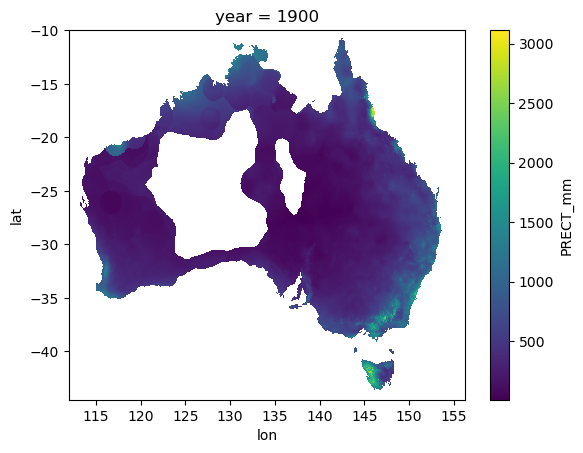

In [114]:
awap.PRECT_mm[0].plot()

In [106]:
awap_rg  = regrid_files(awap)

In [107]:
awap_rg

<xarray.Dataset>
Dimensions:                           (year: 101, lat: 91, lon: 180)
Coordinates:
  * year                              (year) int64 1900 1901 1902 ... 1999 2000
  * lat                               (lat) int64 -90 -88 -86 -84 ... 86 88 90
  * lon                               (lon) int64 0 2 4 6 8 ... 352 354 356 358
Data variables: (12/44)
    pre                               (year, lat, lon) float32 0.0 0.0 ... 0.0
    PRECT_mm                          (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_2s2e                (year, lat, lon) int64 0 0 0 0 ... 0 0 0 0
    drought_years_median              (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_20perc              (year, lat, lon) float32 0.0 0.0 ... 0.0
    drought_years_120pc_2med          (year, lat, lon) int64 0 0 0 0 ... 0 0 0 0
    ...                                ...
    droughts_median_severity          (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_20perc_severity          (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_120pc_2med_severity      (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_220pc_1med_severity      (year, lat, lon) float64 0.0 0.0 ... 0.0
    droughts_2s2e_sum_100yrs          (lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0
    droughts_2s2e_no_events_100yrs    (lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    regrid_method:  bilinear

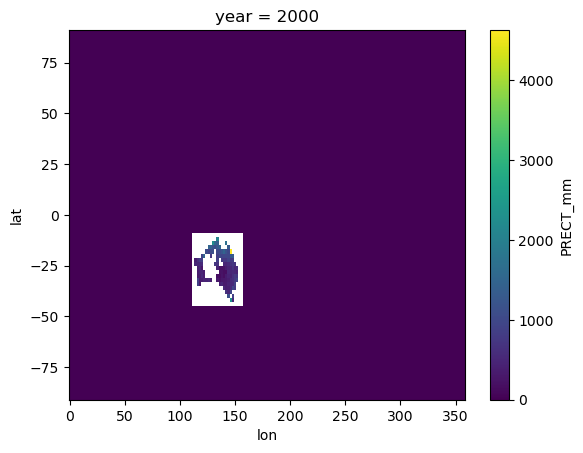

In [108]:
awap_rg.PRECT_mm[-1].plot()

In [109]:
regridded_hist_output_dir

'../files/historical_1900/global_2degrees'

In [110]:
save_netcdf_compression(awap_rg, '../files/historical_1900/', 'awap_gf_annual_2d.nc')

[########################################] | 100% Completed |  0.1s
